## LIBRERIAS

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sweetviz as sv
import dtale

from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from ydata_profiling import ProfileReport
from autoviz.AutoViz_Class import AutoViz_Class

Imported v0.1.905. Please call AutoViz in this sequence:
    AV = AutoViz_Class()
    %matplotlib inline
    dfte = AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=1, lowess=False,
               chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30, save_plot_dir=None)


### CARGAR DATOS Y ANALISIS GENERAL

In [4]:
sell_in = pd.read_csv('sell-in.txt.gz', compression='gzip', sep='\t')
productos = pd.read_csv('tb_productos.txt', sep='\t')  
stocks= pd.read_csv('tb_stocks.txt', sep='\t')

# Merge entre ventas y productos usando `product_id`
df_ventas_productos = pd.merge(sell_in, productos, on='product_id', how='left')

# Merge con el stock, usando `periodo` y `product_id`
df = pd.merge(df_ventas_productos, stocks, on=['periodo', 'product_id'], how='left')
# 3. Conversión de 'periodo' a datetime
df['periodo'] = pd.to_datetime(df['periodo'].astype(str) + '01', format='%Y%m%d')

### Usando la libreria sweetvix

                                             |          | [  0%]   00:00 -> (? left)


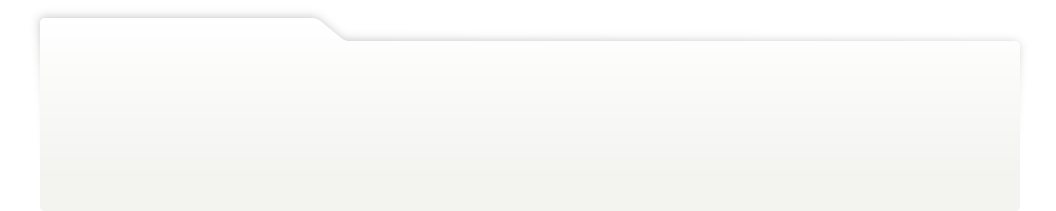
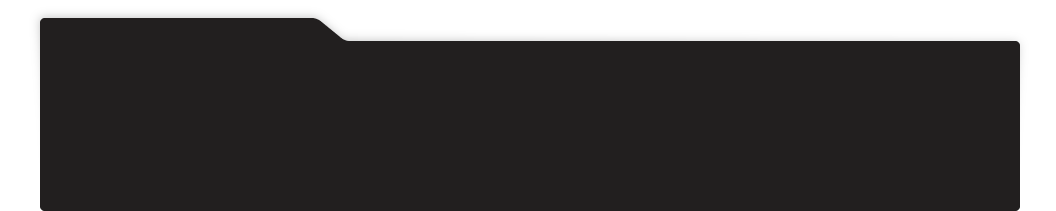
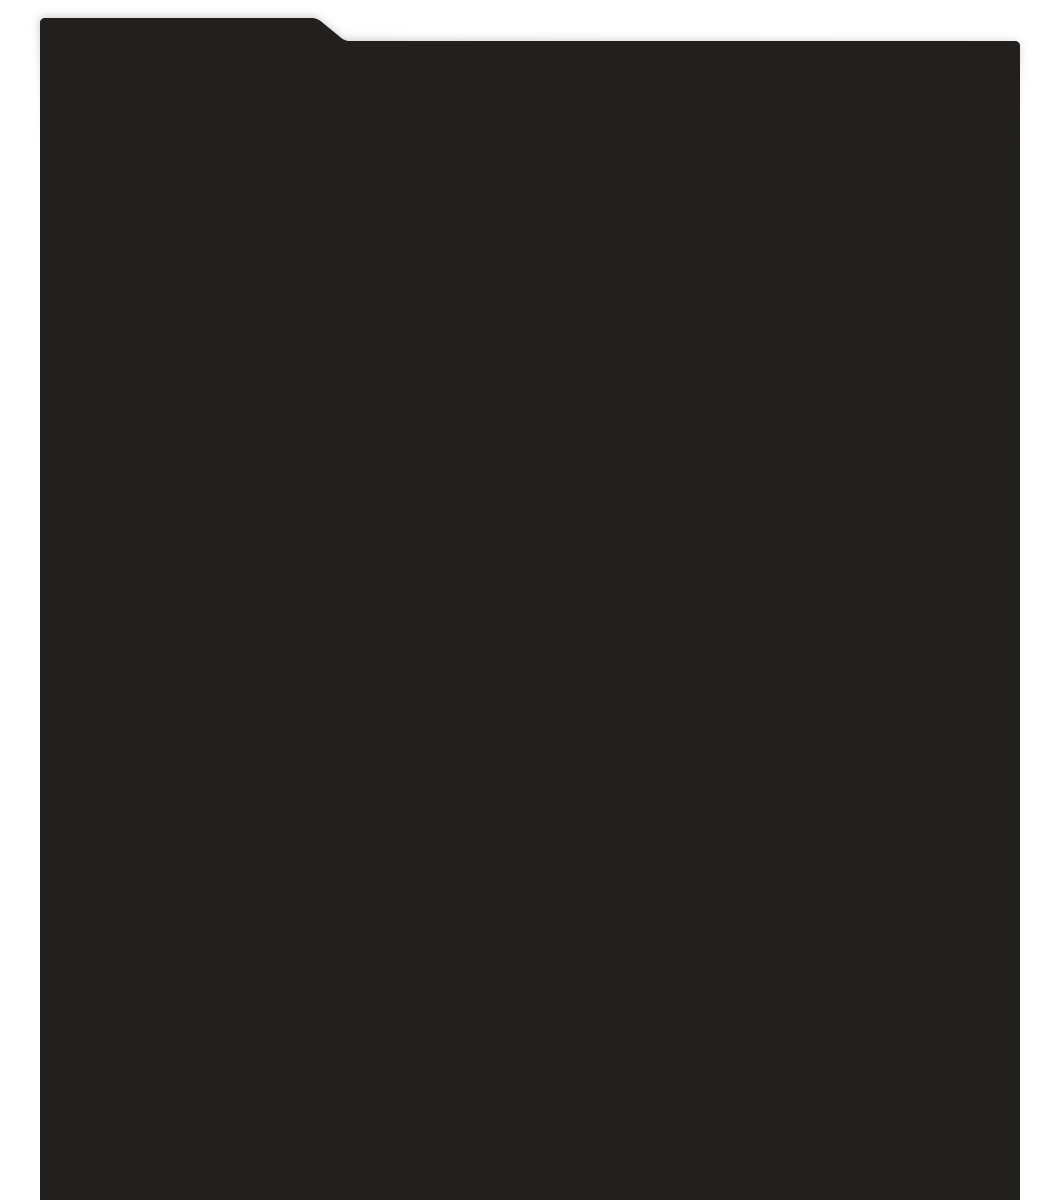
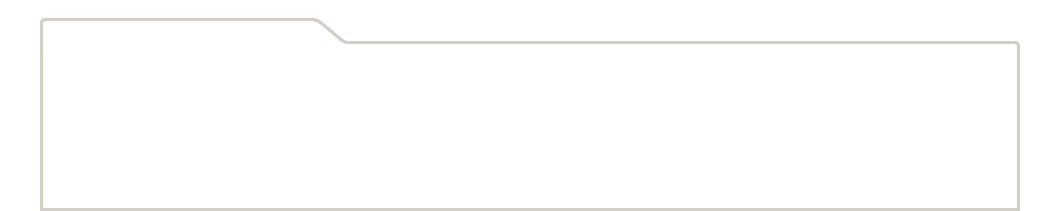
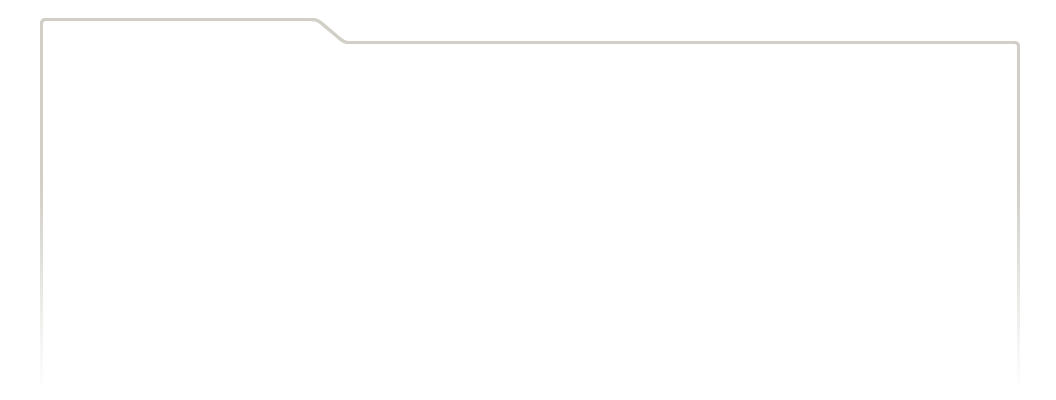
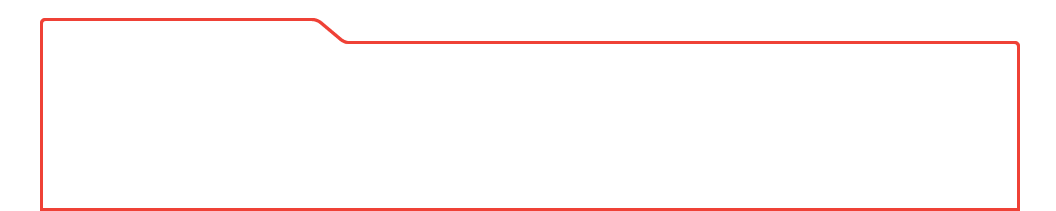
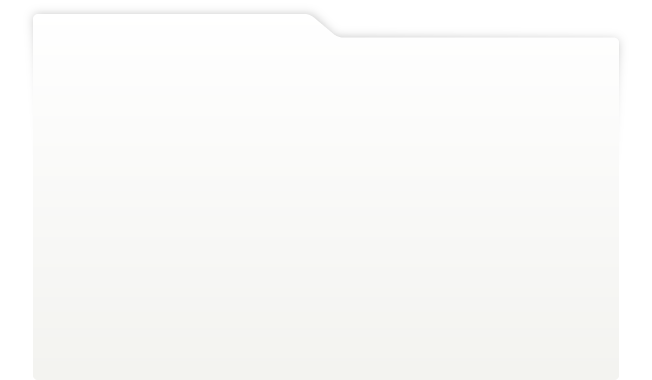
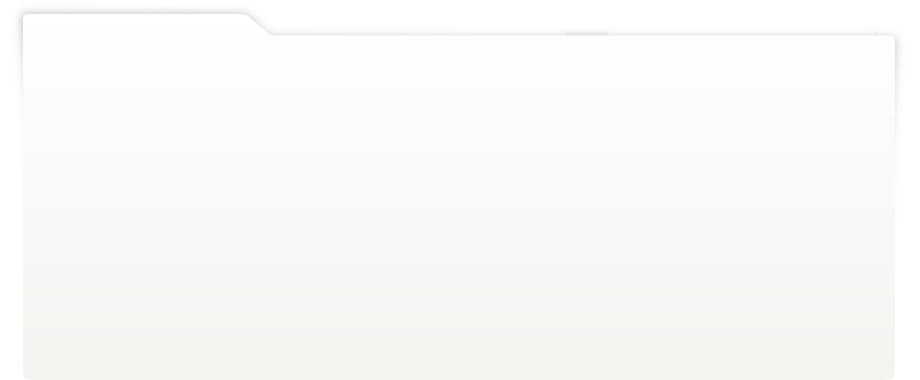
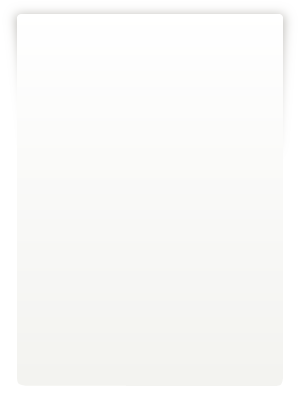
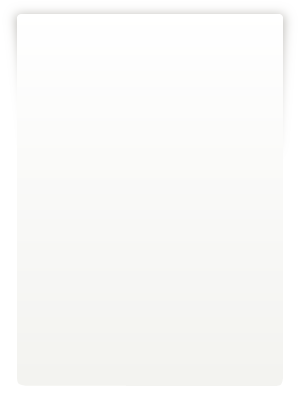
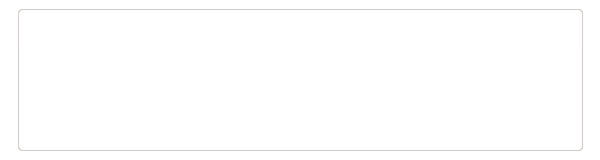
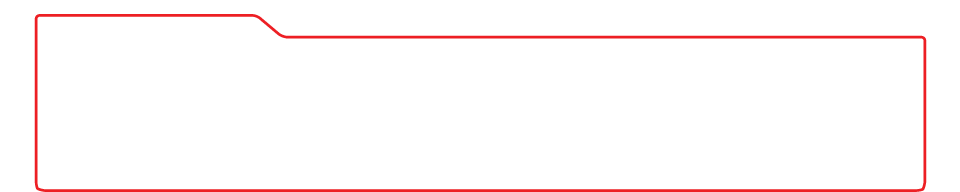
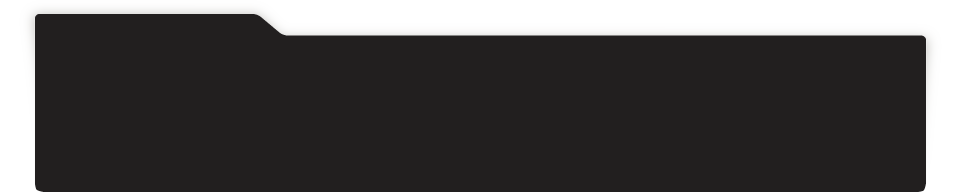
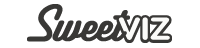
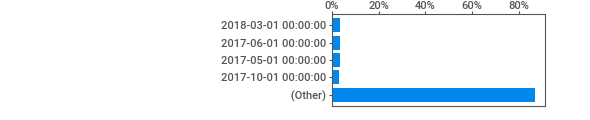
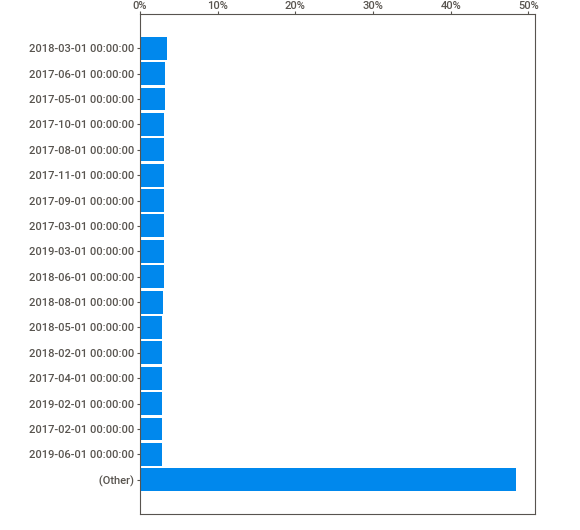
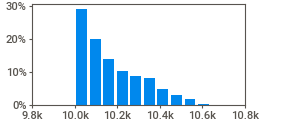
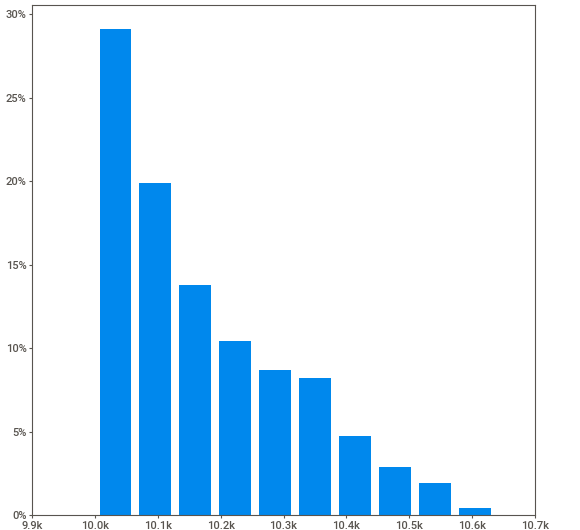
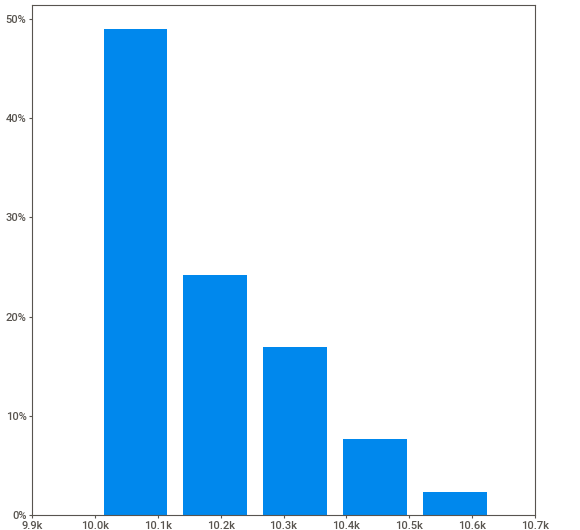
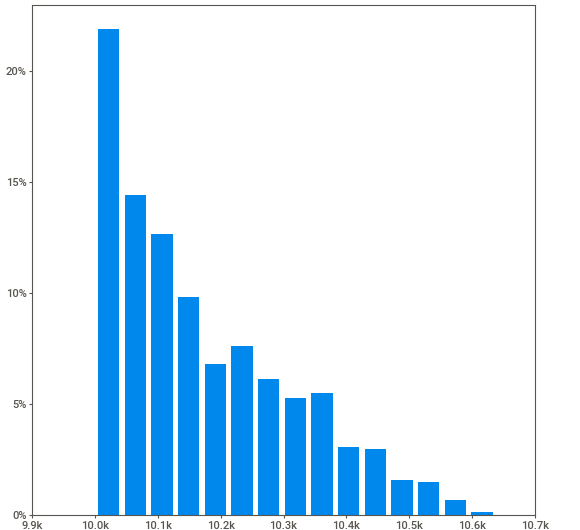
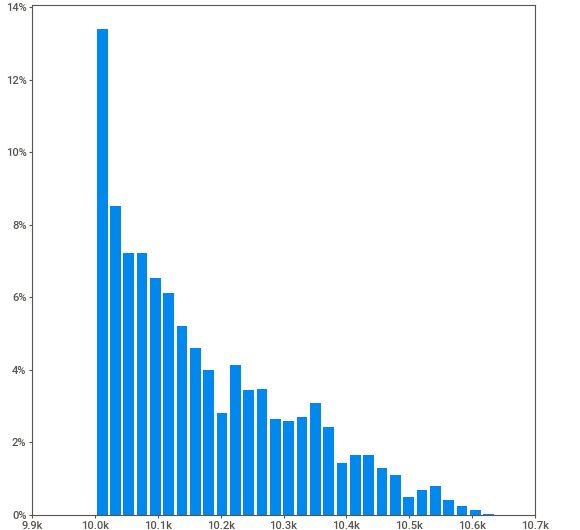
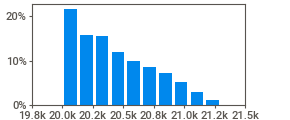
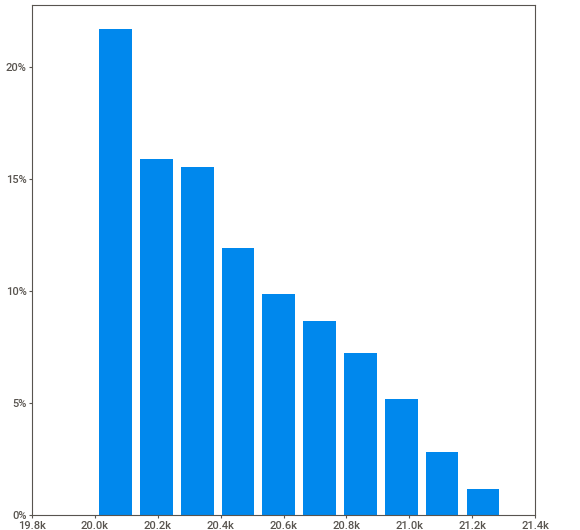
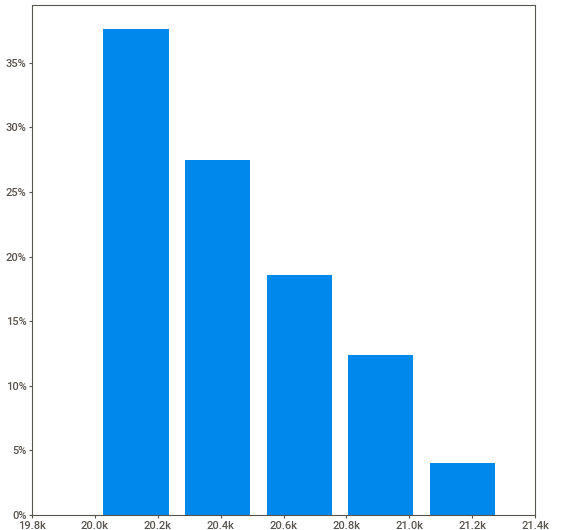
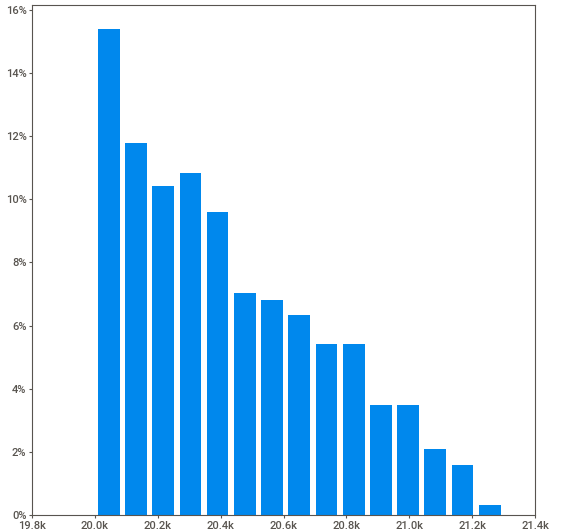
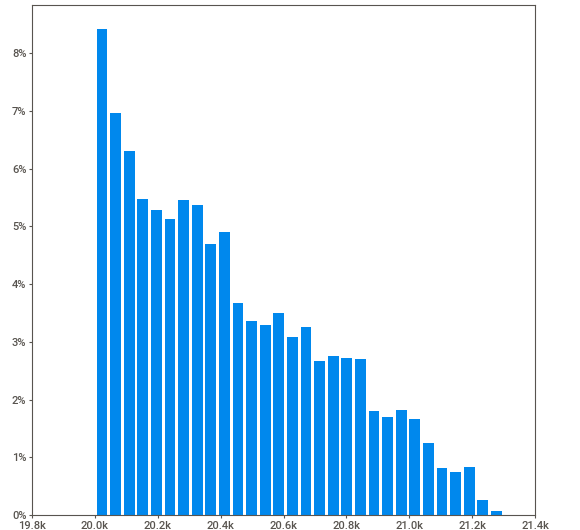
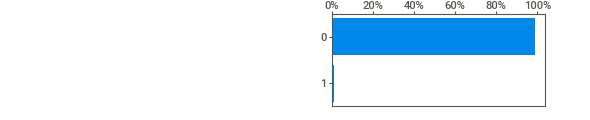
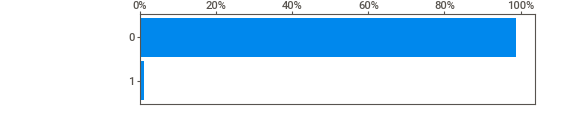
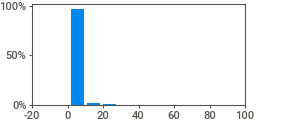
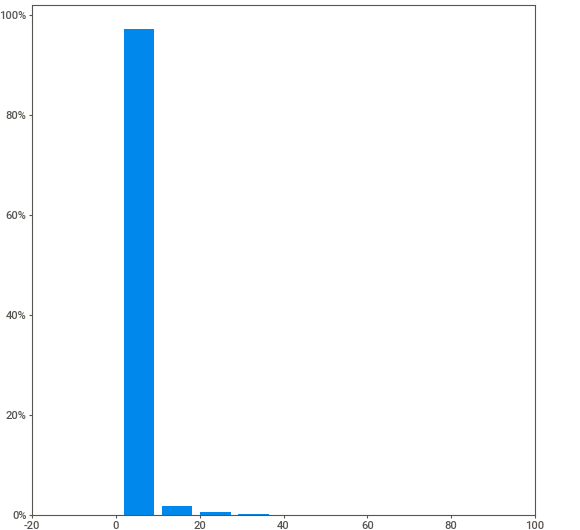
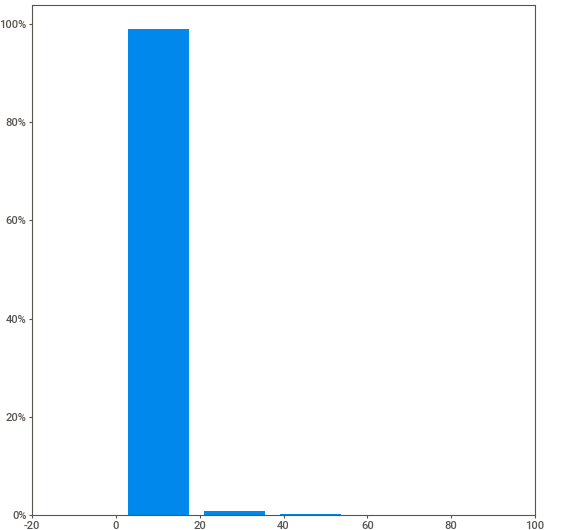
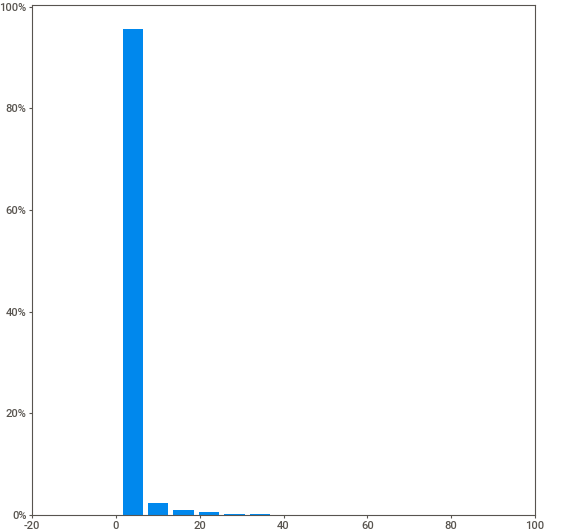
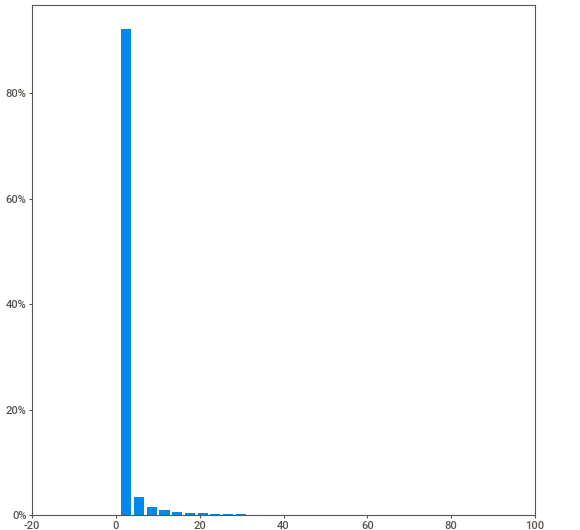
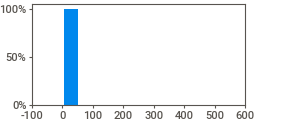
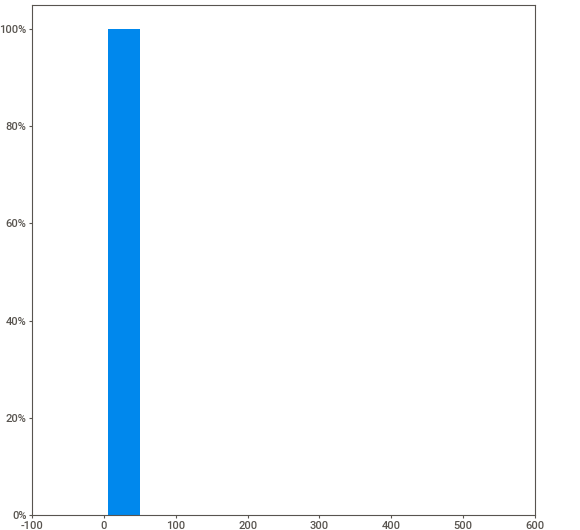
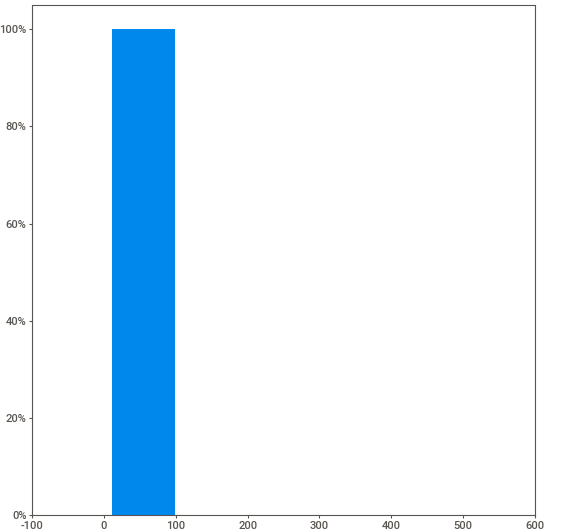
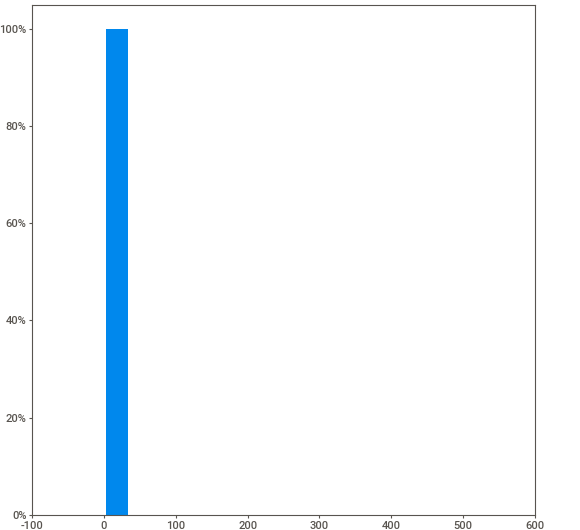
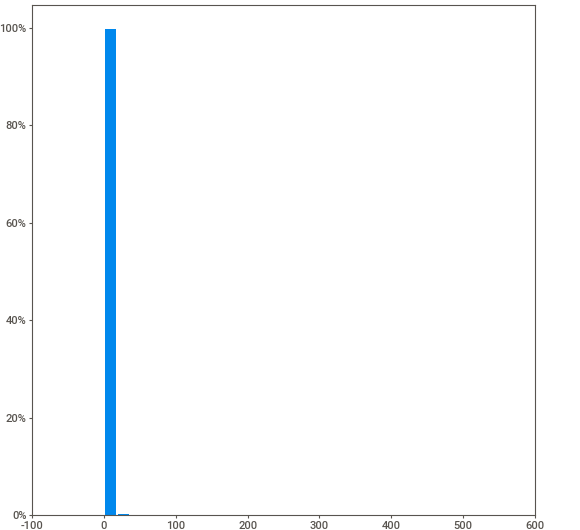
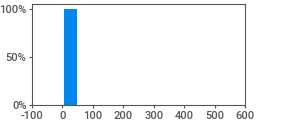
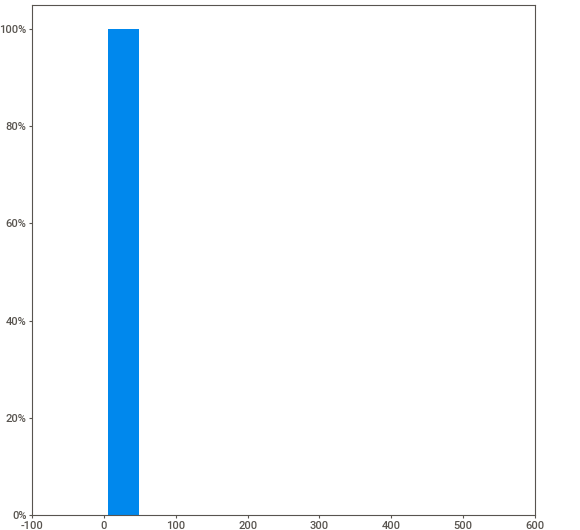
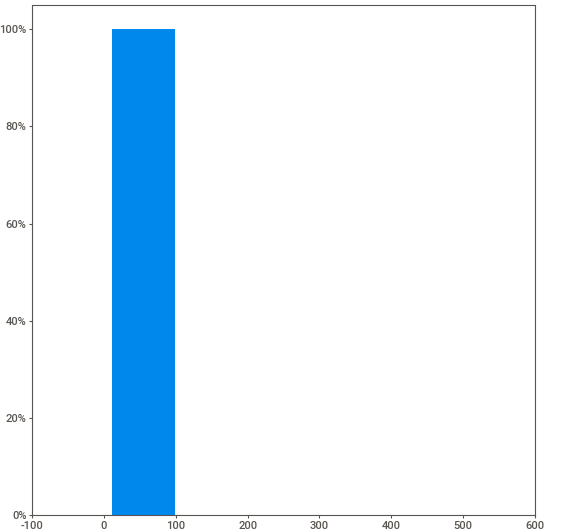
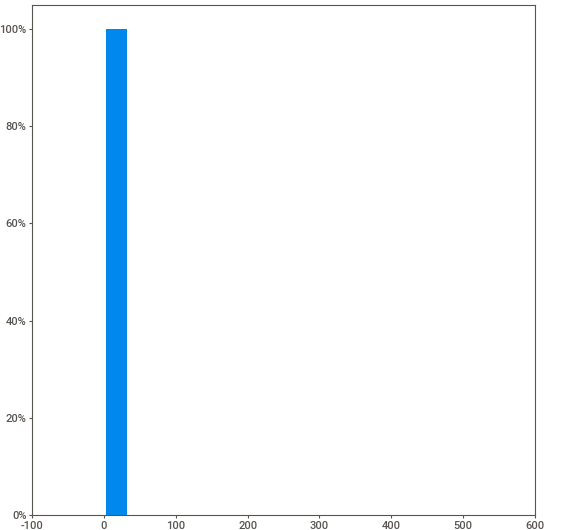
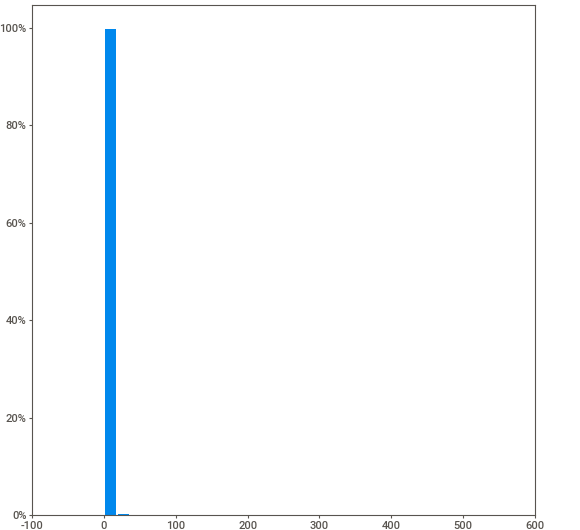
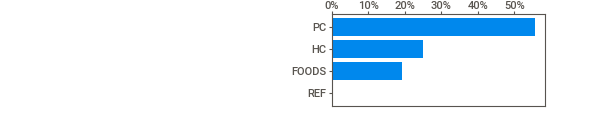
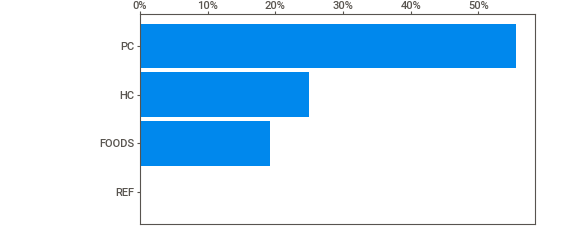
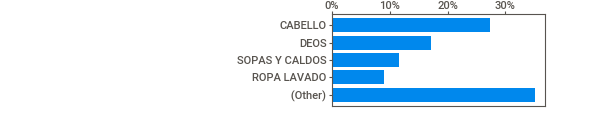
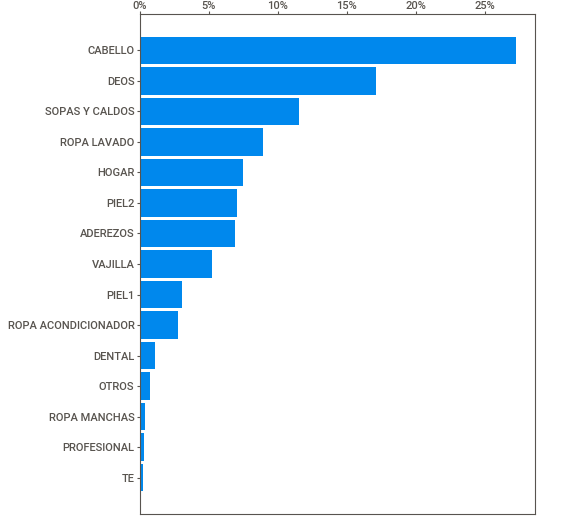
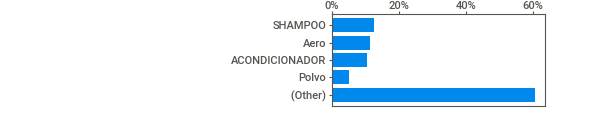
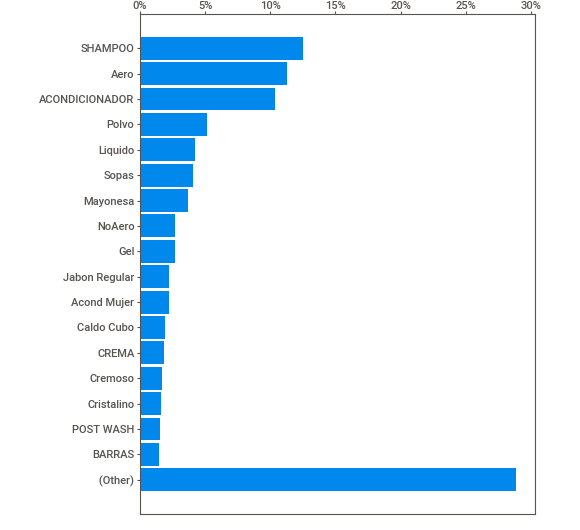
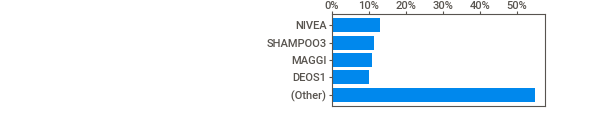
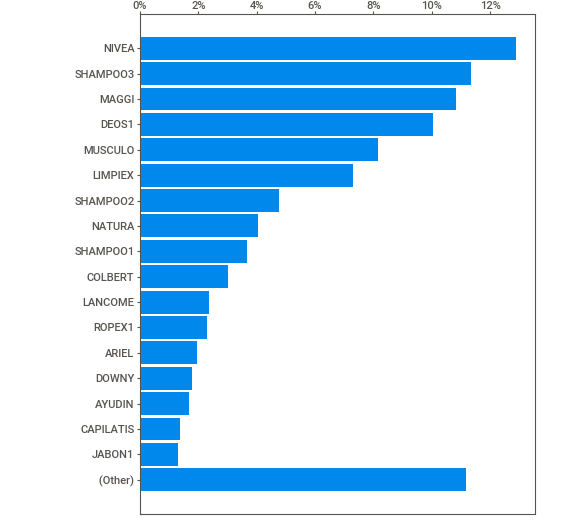
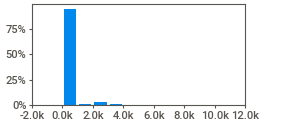
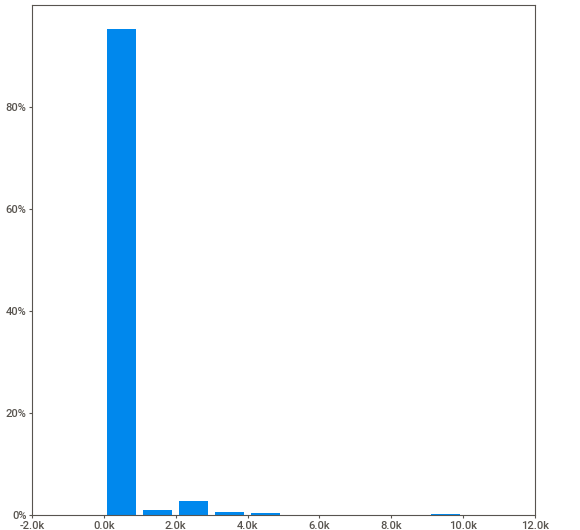
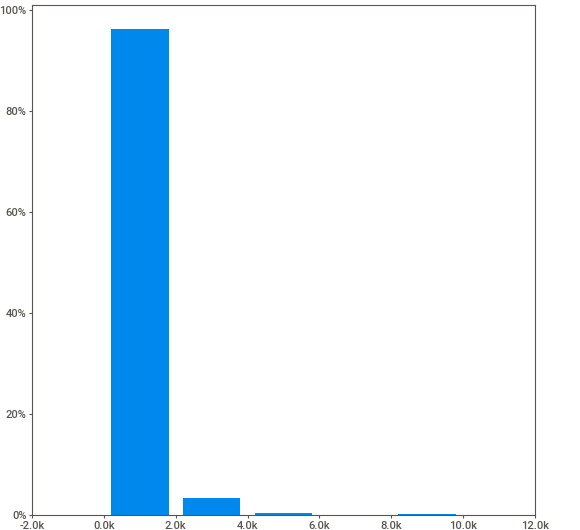
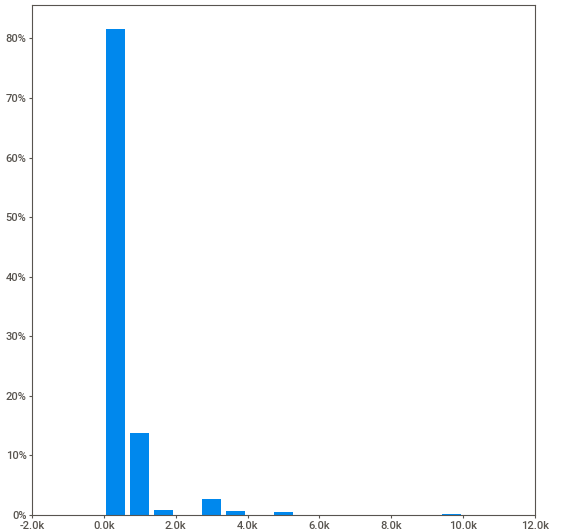
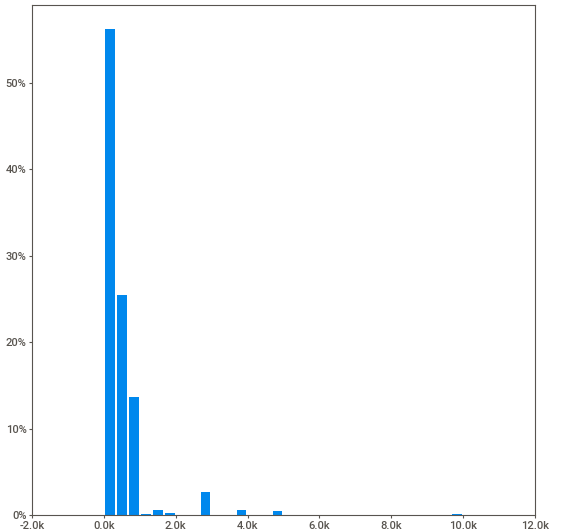
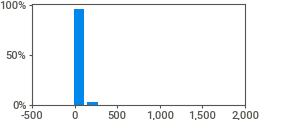
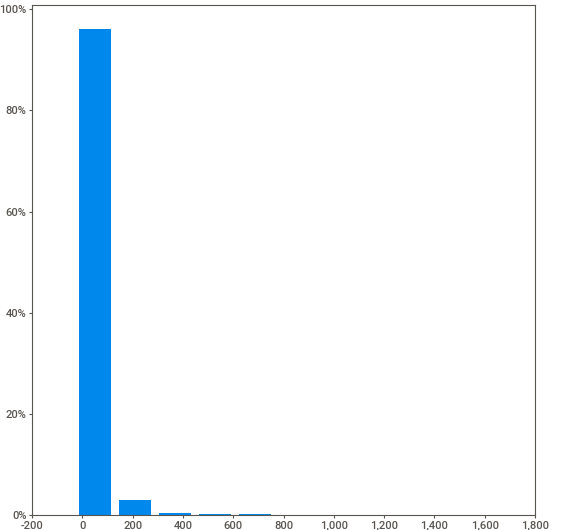
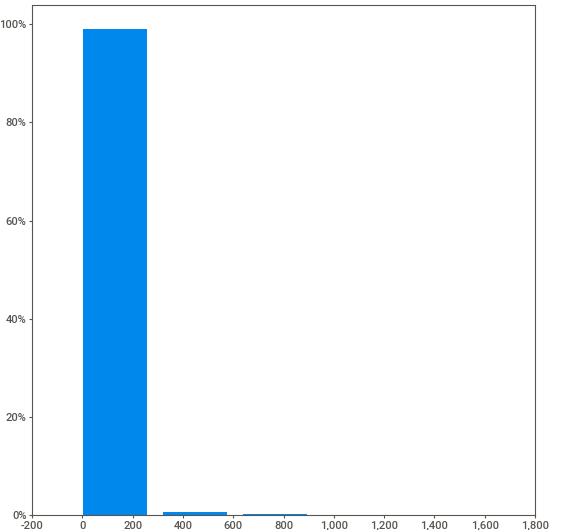
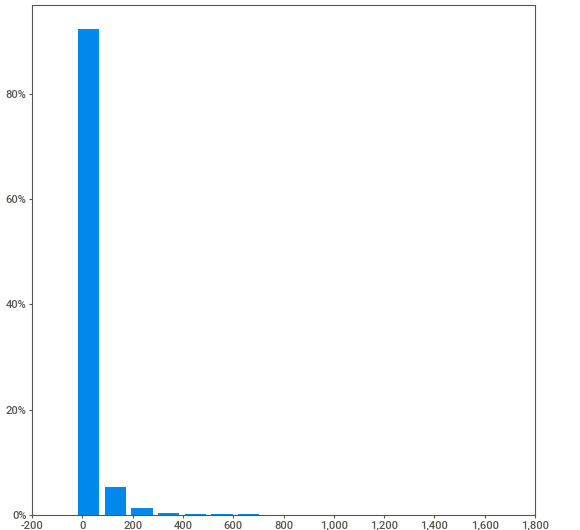
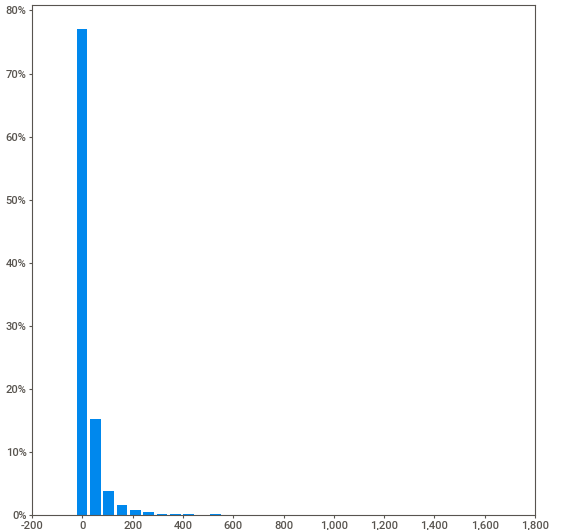
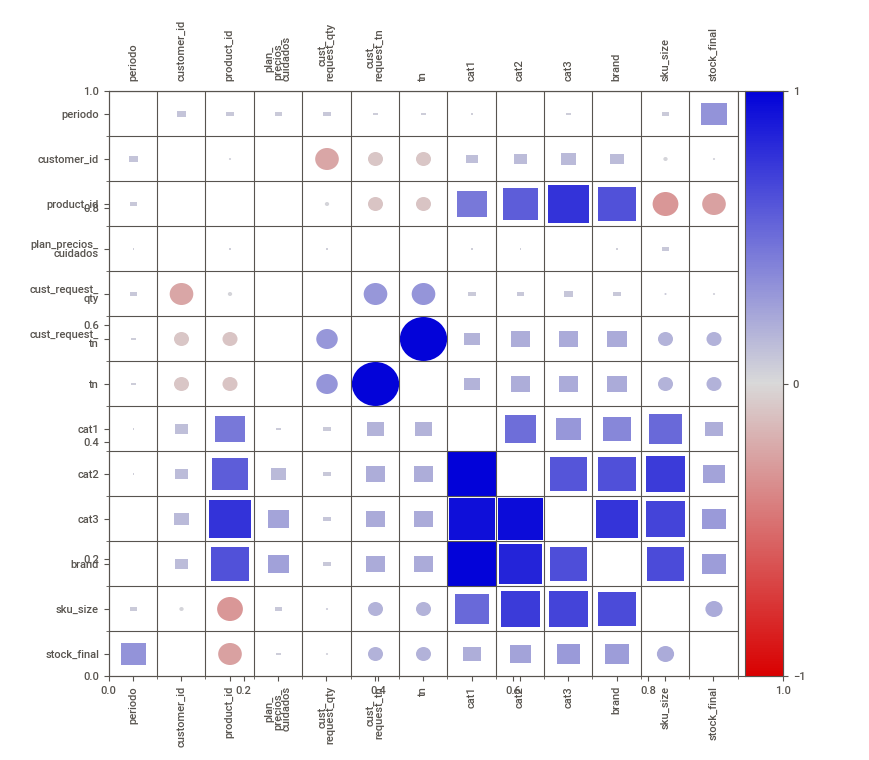
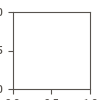

In [8]:
report = sv.analyze(df)
report.show_notebook()

### Usando la libreria Pandas Profiling

In [ ]:

profile = ProfileReport(df, title='Informe de Análisis Exploratorio de Datos', explorative=True)
profile.to_widgets()

In [12]:
profile = ProfileReport(df, title="Reporte EDA de Ventas", explorative=True)

# Guardar el informe HTML:
profile.to_file("reporte_eda_ventas.html")


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 13/13 [00:51<00:00,  3.99s/it]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### Usando AutoViz

In [ ]:
AV = AutoViz_Class()

dft = AV.AutoViz(
    "",
    sep=",",
    depVar="",
    dfte=df,
    header=0,
    verbose=1,
    lowess=False,
    chart_format="server",
    max_rows_analyzed=2945818,
    max_cols_analyzed=30,
    save_plot_dir=None
)

    Since nrows is smaller than dataset, loading random sample of 150000 rows into pandas...
Shape of your Data Set loaded: (150000, 13)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  4
    Number of Integer-Categorical Columns =  3
    Number of String-Categorical Columns =  4
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  1
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  1
    Number of ID Columns =  0
    Number of Columns to Delete =  0
    13 Predictors classified...
        No variables removed since no ID or low-information variables found in data se

pair_scatters can be found in URL below:
Launching server at http://localhost:41297


distplots can be found in URL below:
Launching server at http://localhost:41701


violinplots can be found in URL below:
Launching server at http://localhost:34273


heatmaps can be found in URL below:
Launching server at http://localhost:33297


timeseries_plots can be found in URL below:
Launching server at http://localhost:46547


cat_var_plots can be found in URL below:
Launching server at http://localhost:40787
Time to run AutoViz (in seconds) = 5


In [ ]:
### Usando dtale

In [5]:
d = dtale.show(df, ignore_duplicate=True)
d.open_browser()

2025-05-19 00:42:58,734 - ERROR    - Exception occurred while processing request: It appears there is duplicates in your index, please specify an aggregation!
Traceback (most recent call last):
  File "/home/nico-churrarin/Escritorio/2023 Maestria Austral/2025/Fundamentos del Aprendizaje Automatico/Ptyhon_ambientes/venv/lib/python3.11/site-packages/dtale/views.py", line 120, in _handle_exceptions
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/home/nico-churrarin/Escritorio/2023 Maestria Austral/2025/Fundamentos del Aprendizaje Automatico/Ptyhon_ambientes/venv/lib/python3.11/site-packages/dtale/views.py", line 4379, in get_timeseries_analysis
    data = ts_rpt.run()
           ^^^^^^^^^^^^
  File "/home/nico-churrarin/Escritorio/2023 Maestria Austral/2025/Fundamentos del Aprendizaje Automatico/Ptyhon_ambientes/venv/lib/python3.11/site-packages/dtale/timeseries_analysis.py", line 48, in run
    return self.report.run(data)
           ^^^^^^^^^^^^^^^^^^^^^
  Fi